<a href="https://colab.research.google.com/github/HHH023/coastline_extraction/blob/main/cnn_sea_land_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sea and Land classification using ResNet-18**




In [ ]:
import ee

ee.Authenticate()
ee.Initialize()

Construct Sea/Land dataset

In [ ]:
!pip install geetools

In [ ]:
!pip install --upgrade geetools

In [ ]:
import geetools

In [ ]:
bands = ['B2', 'B3', 'B4']
dataset = (ee.ImageCollection('COPERNICUS/S2')
       .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
       .select(bands))

In [ ]:
# extarct every image in an ImageCollection
# input: coordinates of a geometry point
#     ImageCollection
#     folder for storage    

def gen_images(point, image_collection, foldername):
  # create an approximate 1km2 area
  square = 1e6
  area = point.buffer(ee.Number(square).sqrt().divide(2), 1).bounds()
  image_collection = image_collection.filterBounds(area).limit(200)

  # Set parameters
  scale = 10
  name_pattern = '{system_date}_{id}'
  ## the keywords between curly brackets can be {system_date} for the date of the
  ## image (formatted using `date_pattern` arg), {id} for the id of the image
  ## and/or any image property. You can also pass extra keywords using the `extra`
  ## argument. Also, numeric values can be formatted using a format string (as
  ## shown in {WRS_PATH:%d} (%d means it will be converted to integer)
  date_pattern = 'ddMMMy' # dd: day, MMM: month (JAN), y: year
  folder = foldername
  data_type = 'uint32'
  region = area

  # ## Export
  tasks = geetools.batch.Export.imagecollection.toDrive(
            collection=image_collection,
            folder=folder,
            namePattern=name_pattern,
            region=area,
            scale=scale,
            dataType=data_type,
            datePattern=date_pattern,
            verbose=True,
        )




In [ ]:
point1 = ee.Geometry.Point([122.97, 35.05])
point2 = ee.Geometry.Point([-69.00, 40.98])
point3 = ee.Geometry.Point([-78.74, 25.29])
point4 = ee.Geometry.Point([-57.61, 10.50])
point5 = ee.Geometry.Point([-47.05, -26.24])
point6 = ee.Geometry.Point([-52.60, -33.56])
point7 = ee.Geometry.Point([21.91, -34.85])
point8 = ee.Geometry.Point([50.85, -19.02])
point9 = ee.Geometry.Point([72.84, -0.67])
point10 = ee.Geometry.Point([35.93, 25.32])
point11 = ee.Geometry.Point([2.96, 53.59])
point12 = ee.Geometry.Point([-0.08, 56.51])
point13 = ee.Geometry.Point([19.94, 33.48])
point14 = ee.Geometry.Point([81.40, 14.44])
point15 = ee.Geometry.Point([122.11, 8.73])
point16 = ee.Geometry.Point([111.73, 18.7])
point17 = ee.Geometry.Point([133.42, 35.94])
point18 = ee.Geometry.Point([124.57, -34.03])
point19 = ee.Geometry.Point([152.70, -34.07])
point20 = ee.Geometry.Point([-115.61, 28.84])

In [ ]:
vect = [point3,point4,point5,point6,point7,point8,point9,point10,
        point11,point12,point13,point14,point15,point16,point17,point18,point19,point20]
for i in vect:
   gen_images(i,dataset, foldername)

In [ ]:
land1 = ee.Geometry.Point([98.51, 13.96])
land2 = ee.Geometry.Point([110.58, 20.03])
land3 = ee.Geometry.Point([140.16, 40.05])
land4 = ee.Geometry.Point([138.60, -34.82])
land5 = ee.Geometry.Point([146.23, -38.86])
land6 = ee.Geometry.Point([120.48, -2.76])
land7 = ee.Geometry.Point([19.19, -25.40])
land8 = ee.Geometry.Point([39.34, -6.06])
land9 = ee.Geometry.Point([10.43, 33.54])
land10 = ee.Geometry.Point([-5.47, 36.13])
land11 = ee.Geometry.Point([-3.08, 53.54])
land12 = ee.Geometry.Point([16.69, 59.85])
land13 = ee.Geometry.Point([-74.22, -49.09])
land14 = ee.Geometry.Point([-68.02, -46.55])
land15 = ee.Geometry.Point([-72.52, 5.82])
land16 = ee.Geometry.Point([-107.62, 24.57])
land17 = ee.Geometry.Point([-93.60, 42.19])
land18 = ee.Geometry.Point([38.81, 48.87])
land19 = ee.Geometry.Point([110.70, 32.52])
land20 = ee.Geometry.Point([70.16, 24.27])

In [ ]:
vect2 = [land1,land2,land3,land4,land5,land6,land7,land8,
        land9,land10]
for i in vect2:
   gen_images(i,dataset, foldername2)

In [ ]:
vect3 = [land11,land12,land13,land14,land15,land16,land17,land18,
        land19,land20]
for i in vect3:
   gen_images(i,dataset, foldername2)

In [ ]:
t_sea1 = ee.Geometry.Point([67.47, 22.57])
t_sea2 = ee.Geometry.Point([118.74, 23.88])
t_sea3 = ee.Geometry.Point([119.87, -19.10])
t_sea4 = ee.Geometry.Point([-76.75, 22.90])
t_sea5 = ee.Geometry.Point([-60.21, -40.03])
t_sea6 = ee.Geometry.Point([-71.50, -28.32])
t_sea7 = ee.Geometry.Point([-9.39, 39.21])
t_sea8 = ee.Geometry.Point([3.11, 51.96])
t_sea9 = ee.Geometry.Point([-10.16, 52.85])
t_sea10 = ee.Geometry.Point([33.45, -29.07])

In [ ]:
vect4 = [t_sea1,t_sea2,t_sea3,t_sea4,t_sea5,t_sea6,t_sea7,t_sea8,
        t_sea9,t_sea10]
for i in vect4:
   gen_images(i,dataset, foldername3)

In [ ]:
t_land1 = ee.Geometry.Point([39.20, 8.85])
t_land2 = ee.Geometry.Point([105.38, 29.14])
t_land3 = ee.Geometry.Point([62.93, 37.34])
t_land4 = ee.Geometry.Point([9.74, 49.49])
t_land5 = ee.Geometry.Point([-64.73, -20.36])
t_land6 = ee.Geometry.Point([-81.41, 26.39])
t_land7 = ee.Geometry.Point([-92.27, 38.08])
t_land8 = ee.Geometry.Point([135.48, -13.38])
t_land9 = ee.Geometry.Point([134.87, -28.18])
t_land10 = ee.Geometry.Point([128.18, 43.32])

In [ ]:
vect5 = [t_land1,t_land2,t_land3,t_land4,t_land5,t_land6,t_land7,t_land8,
        t_land9,t_land10]
for i in vect5:
   gen_images(i,dataset, foldername4)

In [ ]:
add_sea1 = ee.Geometry.Point([124.45, 29.41])
add_sea2 = ee.Geometry.Point([139.96, -1.96])
add_sea3 = ee.Geometry.Point([155.37, -25.13])
add_sea4 = ee.Geometry.Point([115.79, -7.63])
add_sea5 = ee.Geometry.Point([80.73, 5.83])
add_sea6 = ee.Geometry.Point([-17.73, 22.44])
add_sea7 = ee.Geometry.Point([-85.29, 29.43])
add_sea8 = ee.Geometry.Point([-81.37, -0.79])
add_sea9 = ee.Geometry.Point([128.18, 43.32])
add_sea10 = ee.Geometry.Point([41.6, -11.66])

In [ ]:
vect6 = [add_sea1,add_sea2,add_sea3,add_sea4,add_sea5,add_sea6,add_sea7,add_sea8,
        add_sea9,add_sea10]
for i in vect6:
   gen_images(i,dataset, foldername5)

In [ ]:
add_land1 = ee.Geometry.Point([35.09, -17.34])
add_land2 = ee.Geometry.Point([30.72, 28.01])
add_land3 = ee.Geometry.Point([64.02, 43.37])
add_land4 = ee.Geometry.Point([26.81, 52.10])
add_land5 = ee.Geometry.Point([114.65, 35.14])
add_land6 = ee.Geometry.Point([152.34, -31.65])
add_land7 = ee.Geometry.Point([-41.99, -11.68])
add_land8 = ee.Geometry.Point([-97.37, 32.54])
add_land9 = ee.Geometry.Point([-110.17, 50.55])
add_land10 = ee.Geometry.Point([0.84, 51.41])

In [ ]:
vect7 = [add_land1,add_land2,add_land3,add_land4,add_land5,add_land6,add_land7,add_land8,
        add_land9,add_land10]
for i in vect7:
   gen_images(i,dataset, foldername6)

In [ ]:
sea2_1 = ee.Geometry.Point([-6.42, 50.23])
sea2_2 = ee.Geometry.Point([12.02, -9.22])
sea2_3 = ee.Geometry.Point([59.78, 19.32])
sea2_4 = ee.Geometry.Point([97.28, -0.54])
sea2_5 = ee.Geometry.Point([158.05, -10.36])
sea2_6 = ee.Geometry.Point([110.85, 16.72])
sea2_7 = ee.Geometry.Point([112.62, -25.89])
sea2_8 = ee.Geometry.Point([-43.74, -1.71])
sea2_9 = ee.Geometry.Point([0.84, 51.41])
sea2_10 = ee.Geometry.Point([-74.18, 35.20])

In [ ]:
vect8 = [sea2_1,sea2_2,sea2_3,sea2_4,sea2_5,sea2_6,sea2_7,sea2_8,
        sea2_9,sea2_10]
for i in vect8:
   gen_images(i,dataset, foldername7)

In [ ]:
land2_1 = ee.Geometry.Point([-79.58, 34.17])
land2_2 = ee.Geometry.Point([-91.20, 32.08])
land2_3 = ee.Geometry.Point([-58.87, -14.39])
land2_4 = ee.Geometry.Point([20.77, -8.37])
land2_5 = ee.Geometry.Point([7.05, 16.68])
land2_6 = ee.Geometry.Point([29.08, 40.97])
land2_7 = ee.Geometry.Point([94.83, 26.01])
land2_8 = ee.Geometry.Point([120.54, 22.42])
land2_9 = ee.Geometry.Point([149.94, -26.96])
land2_10 = ee.Geometry.Point([18.56, 54.40])

In [ ]:
vect9 = [land2_1,land2_2,land2_3,land2_4,land2_5,land2_6,land2_7,land2_8,
        land2_9,land2_10]
for i in vect9:
   gen_images(i,dataset, foldername8)

In [ ]:
land_test_add1 = ee.Geometry.Point([-120.82, 37.37])
land_test_add2 = ee.Geometry.Point([-75.47, -11.8])
land_test_add3 = ee.Geometry.Point([22.14, 37.34])

In [ ]:
vect10 = [land_test_add1, land_test_add2, land_test_add3]
for i in vect10:
   gen_images(i,dataset, foldername9)

In [ ]:
train_sea_add1 = ee.Geometry.Point([-2.74, 50.63])
train_sea_add2 = ee.Geometry.Point([56.21, 17.86])
train_sea_add3 = ee.Geometry.Point([12.74, -7.36])
train_sea_add4 = ee.Geometry.Point([151.11, -20.61])
train_sea_add5 = ee.Geometry.Point([122.54, 27.63])
train_sea_add6 = ee.Geometry.Point([-50.17, -2.97])
train_sea_add7 = ee.Geometry.Point([-100.88, 17.15])
train_sea_add8 = ee.Geometry.Point([-79.58, 32.78])
train_sea_add9 = ee.Geometry.Point([-124.09, 41.49])
train_sea_add10 = ee.Geometry.Point([132.90, -32.09])

In [ ]:
vect11 = [train_sea_add1, train_sea_add2, train_sea_add3, train_sea_add4, train_sea_add5, train_sea_add6, train_sea_add7,
          train_sea_add8, train_sea_add9, train_sea_add10]
for i in vect11:
   gen_images(i,dataset, foldername10)

In [ ]:
test_sea_add1 = ee.Geometry.Point([113.30, -25.38])
test_sea_add2 = ee.Geometry.Point([136.95, 33.44])
test_sea_add3 = ee.Geometry.Point([-2.84, 45.97])
test_sea_add4 = ee.Geometry.Point([-73.27, 39.27])

In [ ]:
vect12 = [test_sea_add1, test_sea_add2, test_sea_add3, test_sea_add2]
for i in vect12:
   gen_images(i,dataset, foldername='test_sea_add')

In [ ]:
test_land_add = ee.Geometry.Point([104.64, 28.74])
gen_images(test_land_add, dataset, foldername11)

In [ ]:
add_train_sea1 = ee.Geometry.Point([93.99, 17.12])
add_train_sea2 = ee.Geometry.Point([-14.74, 27.24])
gen_images(add_train_sea1, dataset, foldername='add_train_sea')
gen_images(add_train_sea2, dataset, foldername='add_train_sea')

In [ ]:
train_sea_add1 = ee.Geometry.Point([-51.85, 47.17])
train_sea_add2 = ee.Geometry.Point([-78.75, 6.87])
train_sea_add3 = ee.Geometry.Point([-6.36, 4.10])
train_sea_add4 = ee.Geometry.Point([130.92, -10.38])
train_sea_add5 = ee.Geometry.Point([-8.53, 43.91])

In [ ]:
vect13 = [train_sea_add1, train_sea_add2, train_sea_add3, train_sea_add4, train_sea_add5] 
for i in vect13:
   gen_images(i,dataset, foldername='train_sea_add')

In [ ]:
test_sea_i1 = ee.Geometry.Point([79.02, 6.66])
test_sea_i2 = ee.Geometry.Point([154.90, -30.43])
test_sea_i3 = ee.Geometry.Point([-33.92, -5.95])

vect14 = [test_sea_i1, test_sea_i2, test_sea_i3]
for i in vect14:
   gen_images(i,dataset, foldername='test_sea_add')

In [ ]:
train_sea_i1 = ee.Geometry.Point([114.64, -32.75])
train_sea_i2 = ee.Geometry.Point([6.19, 53.90])

vect15 = [train_sea_i1, train_sea_i2]
for i in vect15:
   gen_images(i,dataset, foldername='train_sea_add')

In [ ]:
gen_images(ee.Geometry.Point([48.40, 3.03]), dataset, foldername='test_sea_add')

In [ ]:
p1 = ee.Geometry.Point([71.54, 18.69])
gen_images(p1, dataset, foldername='train_sea_add')

In [ ]:
gen_images(ee.Geometry.Point([-84.60, 8.97]), dataset, foldername='test_sea_add')

In [ ]:
import os

in_path = "/content/drive/MyDrive/coastline_tif"
count = 0
for root, dirs, files in os.walk(in_path, topdown=False):
    for name in files:
      count = count+1

print(count)

5029


Load an image from Google drive for visualization

In [ ]:
!pip install rasterio

In [ ]:
import os
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import reshape_as_image
from PIL import Image

raster_path = os.path.join('drive/MyDrive', 'train_sea_temporary', '01Aug2017_20170801T080959_20170801T081306_T36RYP')
sen_raster_path = ".".join([raster_path, "tif"])


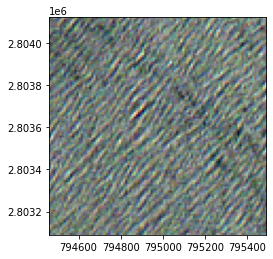

In [ ]:

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Open and read the raster data
with rio.open(sen_raster_path, 'r') as sen_raster:
  sen_data = sen_raster.read()
  
# To plot as RGB we have to normalize the data
sen_image = np.empty(sen_data.shape, dtype=np.float)
for band in range(sen_data.shape[0]):
  sen_image[band] = normalize(sen_data[band])

fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(10, 4), sharey=True)
show(sen_image[[2,1,0],:,:], transform=sen_raster.transform, adjust='linear', ax=ax1) # RGB

sen_image = sen_image.transpose(1,2,0)
random_image=Image.fromarray((sen_image*255).astype(np.uint8))
random_image.save("image.jpg")

Convert batch GeoTIFF files into JPG images and store in another folder.

In [ ]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))


In [ ]:
in_path = "drive/My Drive/test_sea_add/"
out_path = "drive/My Drive/test_sea_add_im/"
count=0
for root, dirs, files in os.walk(in_path, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        if os.path.splitext(os.path.join(root, name))[1].lower() == ".tif":
            if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".jpg"):
                print('A jpeg file already exists for %s' % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(out_path, name))[0] + ".jpg"
                try:
                    raster_path = os.path.join(in_path, name)
                    with rio.open(raster_path, 'r') as sen_raster:
                        sen_data = sen_raster.read()
                    # To plot as RGB we have to normalize the data
                    sen_image = np.empty(sen_data.shape, dtype=np.float)
                    for band in range(sen_data.shape[0]):
                        sen_image[band] = normalize(sen_data[band])
                    sen_image = sen_image.transpose(1,2,0)
                    save_image=Image.fromarray((sen_image*255).astype(np.uint8))
                    # save in JPG                    
                    save_image.save(outfile, "JPEG", quality=100)
                    count = count+1
                except Exception as e:
                    print(e)
print(count)                    

Load data sets into colab for faster manipulation.

In [ ]:
# Load dataset to colab
!unzip -uq '/content/drive/MyDrive/train_zip/sea.zip' -d '/content/sea_land_trainset/sea'
!unzip -uq '/content/drive/MyDrive/train_zip/land.zip' -d '/content/sea_land_trainset/land'
!unzip -uq '/content/drive/MyDrive/test_zip/sea.zip' -d '/content/sea_land_testset/sea'
!unzip -uq '/content/drive/MyDrive/test_zip/land.zip' -d '/content/sea_land_testset/land'

In [ ]:
!unzip -uq '/content/drive/MyDrive/train_zip/sea.zip' -d '/content/sea_land_total/sea'
!unzip -uq '/content/drive/MyDrive/train_zip/land.zip' -d '/content/sea_land_total/land'
!unzip -uq '/content/drive/MyDrive/test_zip/sea.zip' -d '/content/sea_land_total/sea'
!unzip -uq '/content/drive/MyDrive/test_zip/land.zip' -d '/content/sea_land_total/land'

The training and test folders were mixed and then randomly redistributed in a ratio of 8:2.

In [ ]:
import os
import random
import math
import shutil

def data_split(old_path):
    new_path = 'data'
    if os.path.exists('data') == 0:
        os.makedirs(new_path)
    for root_dir, sub_dirs, file in os.walk(old_path):                               # 遍历os.walk(）返回的每一个三元组，内容分别放在三个变量中
        for sub_dir in sub_dirs:
            file_names = os.listdir(os.path.join(root_dir, sub_dir))                 # 遍历每个次级目录
            file_names = list(filter(lambda x: x.endswith('.jpg'), file_names))      # 去掉列表中的非jpg格式的文件

            random.shuffle(file_names)
            for i in range(len(file_names)):
                if i < math.floor(0.8*len(file_names)):
                    sub_path = os.path.join(new_path, 'train_set', sub_dir)
                elif i < len(file_names):
                    sub_path = os.path.join(new_path, 'test_set', sub_dir)
                if os.path.exists(sub_path) == 0:
                    os.makedirs(sub_path)

                shutil.copy(os.path.join(root_dir, sub_dir, file_names[i]), os.path.join(sub_path, file_names[i]))   # 复制图片，从源到目的地

totalpath = '/content/sea_land_total'
data_split(totalpath)

In [ ]:
!rm -rf my_che sea_land_total

In [ ]:
import os
in_path = "/content/drive/MyDrive/coastline_geotiff_add"
count = 0
for root, dirs, files in os.walk(in_path, topdown=False):
    for name in files:
      count = count+1

print(count)

1764


# **CNN Classifier**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from tqdm import tqdm

In [ ]:
trainpath = '/content/data/train_set'
testpath = '/content/data/test_set'
batch_size = 128
train_tfms = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor()])
train_set = datasets.ImageFolder(root=trainpath, transform=train_tfms)
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)

def get_mean_std(loader):
    # var[X] = E[X**2] - E[X]**2
    channels_sum, channels_sqrd_sum, num_batches = 0, 0, 0

    for data, _ in tqdm(loader):
        channels_sum += torch.mean(data, dim=[0, 2, 3])
        channels_sqrd_sum += torch.mean(data ** 2, dim=[0, 2, 3])
        num_batches += 1

    mean = channels_sum / num_batches
    std = (channels_sqrd_sum / num_batches - mean ** 2) ** 0.5

    return mean, std


mean, std = get_mean_std(train_loader)

print('\nmean:', mean)
print('std:', std)

100%|██████████| 63/63 [00:05<00:00, 10.62it/s]


mean: tensor([0.3138, 0.3245, 0.3164])
std: tensor([0.1739, 0.1708, 0.1789])


In [ ]:
# Data transforms (normalization & data augmentation)
train_tfms = transforms.Compose([transforms.Resize((64, 64)), 
                         transforms.RandomCrop(64), 
                         transforms.RandomHorizontalFlip(64), 
                         transforms.ToTensor(),
                         transforms.Normalize(mean, std)])
test_tfms = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor(), transforms.Normalize(mean, std)])
# image = (image - mean) / std 

trainsset = datasets.ImageFolder(root=trainpath, transform=train_tfms)

trainset,validset = random_split(trainsset,[6000, 2000])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=testpath, transform=test_tfms)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

print(trainsset.classes)
print(testset.classes)

['land', 'sea']
['land', 'sea']


image_size: torch.Size([128, 3, 64, 64])


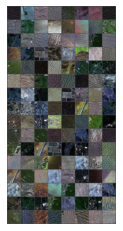

sea land land sea sea sea sea sea sea land sea land sea sea sea land land land sea land sea sea land sea sea land land sea land land sea sea sea sea sea sea land land land land land sea land sea sea sea sea land land land land sea land land sea land land land land sea sea land land land sea sea land sea sea sea land land sea land land sea sea land sea sea land land land land land land sea sea sea sea land sea sea land land sea land land sea land land land sea sea land land sea sea land sea land land land land land land land land land sea sea land sea sea sea sea sea sea


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
  un_mean = mean.view(-1, 1, 1)
  un_std = std.view(-1, 1, 1)
  img = img * un_std + un_mean   # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.axis('off')
  # nuumpy uses H*W*C, while the pytorch uses C*H*W
  plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print("image_size:",images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%3s' % trainsset.classes[labels[j]] for j in range(batch_size)))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)


cuda:0


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(nn.Conv2d(in_planes, self.expansion*planes,
                         kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes) )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion*planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes) )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=2):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])

net = ResNet18().to(device)
#net = ResNet34().to(device)
#net = ResNet50().to(device)

In [ ]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 52, eta_min=0.0001)

# stochastic gradient descent 

In [ ]:
def draw_result(lst_iter, train, valid, title):
    plt.plot(lst_iter, train, '-b', label='train set')
    plt.plot(lst_iter, valid, '-r', label='validation set')

    plt.xlabel("n epoch")
    plt.legend(loc='upper left')
    plt.title(title)

    # show
    plt.show()

[epoch 1] accuracy: 83.267, loss: 0.376
Accuracy of the network on the validation set: 92.200, loss: 0.205
[epoch 2] accuracy: 92.583, loss: 0.193
Accuracy of the network on the validation set: 93.750, loss: 0.153
[epoch 3] accuracy: 94.983, loss: 0.126
Accuracy of the network on the validation set: 96.150, loss: 0.105
[epoch 4] accuracy: 96.383, loss: 0.099
Accuracy of the network on the validation set: 95.500, loss: 0.099
[epoch 5] accuracy: 97.650, loss: 0.067
Accuracy of the network on the validation set: 97.450, loss: 0.064
[epoch 6] accuracy: 98.450, loss: 0.048
Accuracy of the network on the validation set: 95.000, loss: 0.120
[epoch 7] accuracy: 98.633, loss: 0.041
Accuracy of the network on the validation set: 96.850, loss: 0.081
[epoch 8] accuracy: 98.900, loss: 0.031
Accuracy of the network on the validation set: 97.050, loss: 0.075
[epoch 9] accuracy: 99.367, loss: 0.021
Accuracy of the network on the validation set: 98.400, loss: 0.051
[epoch 10] accuracy: 99.550, loss: 0.

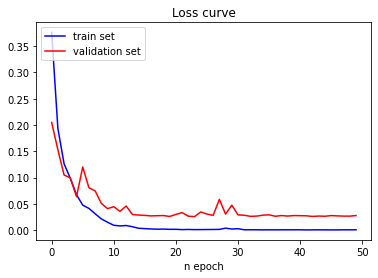

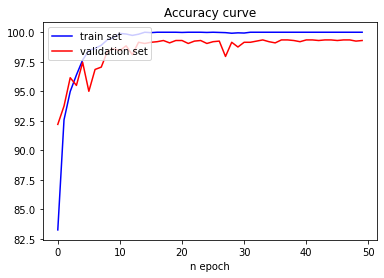

In [ ]:
best_val_acc = -1000
PATH = './sea_land.pth'
epoch_num = 50
train_loss_np = []
train_acc_np = []
valid_loss_np = []
valid_acc_np = []

for epoch in range(epoch_num):  # loop over the dataset multiple times
    
    net.train()
    running_loss = 0.0
    running_correct = 0
    running_total = 0 

    ####### training set #######
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()  # update

        # print statistics
        running_loss += loss.item()*inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        running_total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
    train_loss = running_loss/len(trainset)
    train_acc = 100*running_correct/len(trainset)
    print('[epoch %d] accuracy: %.3f, loss: %.3f' %
                  (epoch + 1, train_acc, train_loss))     
    train_loss_np.append(train_loss)
    train_acc_np.append(train_acc)


    ####### validation set #######
    net.eval()
    valiloss = 0
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in validloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            # calculate outputs by running images through the network
            outputs = net(images)
            loss = criterion(outputs, labels)
            valiloss += loss.item()*inputs.size(0)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    valid_loss = valiloss/len(validset)
    valid_acc = 100*correct/len(validset)
    print('Accuracy of the network on the validation set: %.3f, loss: %.3f' % (
                     valid_acc, valid_loss))
        
    valid_loss_np.append(valid_loss)
    valid_acc_np.append(valid_acc)    


    if correct>best_val_acc:
        best_val_acc = correct
        torch.save(net.state_dict(), PATH)
    lr_scheduler.step() 
print('Finished Training')

draw_result(range(epoch_num), train_loss_np, valid_loss_np, 'Loss curve')
draw_result(range(epoch_num), train_acc_np, valid_acc_np, 'Accuracy curve')

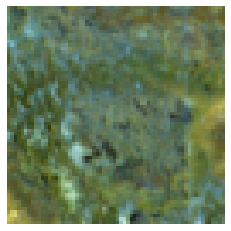

Predicted:   sea   GroundTruth:  land


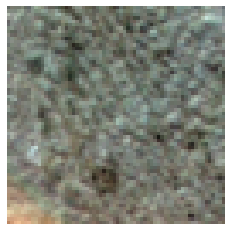

Predicted:   sea   GroundTruth:  land


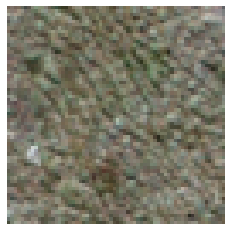

Predicted:   sea   GroundTruth:  land


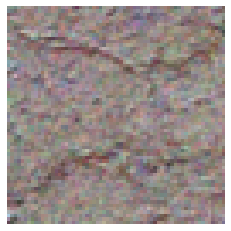

Predicted:   sea   GroundTruth:  land


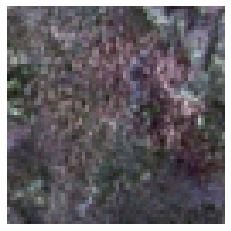

Predicted:   sea   GroundTruth:  land


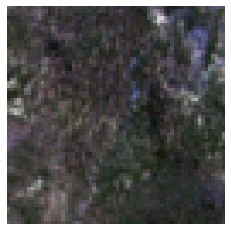

Predicted:   sea   GroundTruth:  land


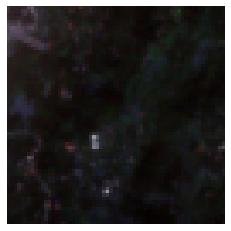

Predicted:   sea   GroundTruth:  land


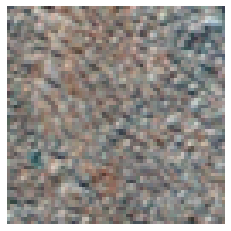

Predicted:   sea   GroundTruth:  land


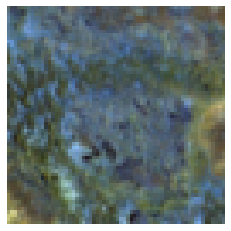

Predicted:   sea   GroundTruth:  land


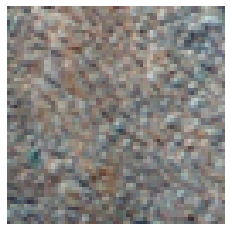

Predicted:   sea   GroundTruth:  land


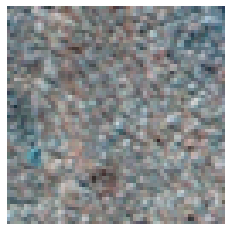

Predicted:   sea   GroundTruth:  land


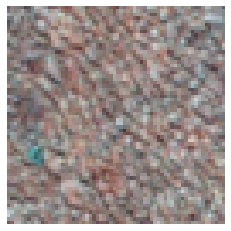

Predicted:   sea   GroundTruth:  land


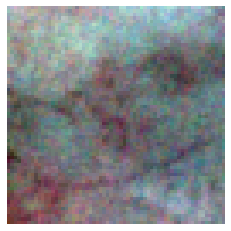

Predicted:   sea   GroundTruth:  land


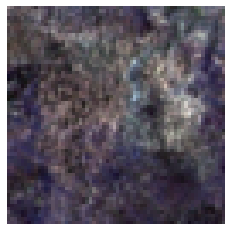

Predicted:   sea   GroundTruth:  land


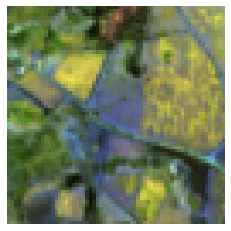

Predicted:   sea   GroundTruth:  land


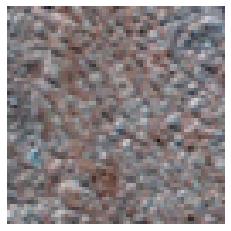

Predicted:   sea   GroundTruth:  land


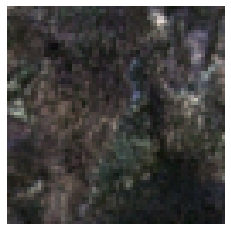

Predicted:   sea   GroundTruth:  land


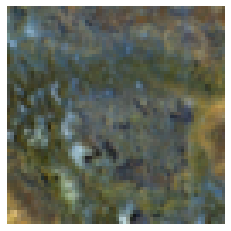

Predicted:   sea   GroundTruth:  land


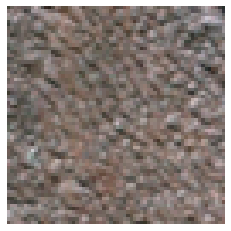

Predicted:   sea   GroundTruth:  land


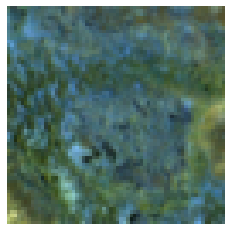

Predicted:   sea   GroundTruth:  land


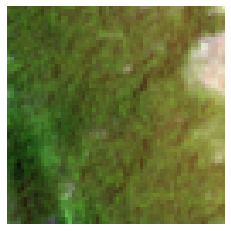

Predicted:   sea   GroundTruth:  land


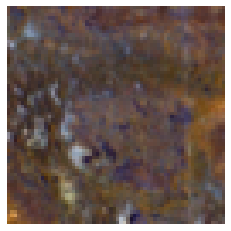

Predicted:   sea   GroundTruth:  land


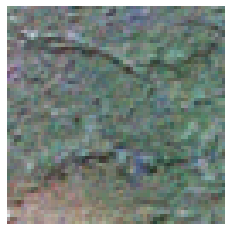

Predicted:   sea   GroundTruth:  land


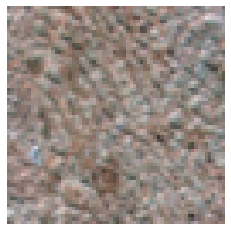

Predicted:   sea   GroundTruth:  land


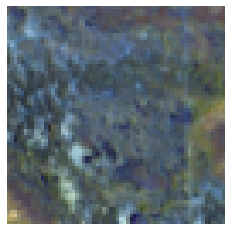

Predicted:   sea   GroundTruth:  land


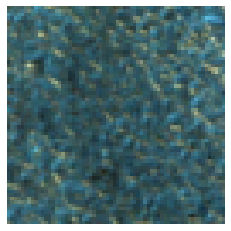

Predicted:   sea   GroundTruth:  land


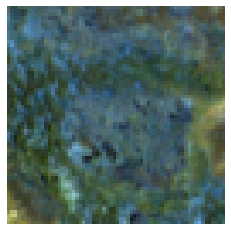

Predicted:   sea   GroundTruth:  land


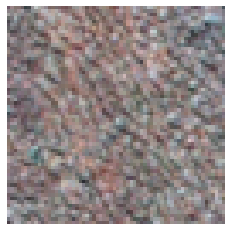

Predicted:   sea   GroundTruth:  land


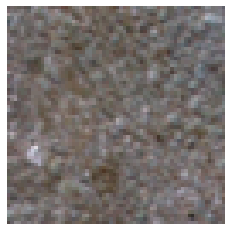

Predicted:   sea   GroundTruth:  land


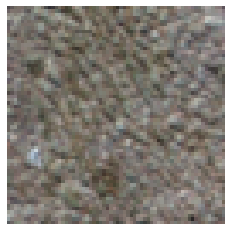

Predicted:   sea   GroundTruth:  land


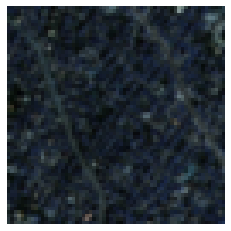

Predicted:   sea   GroundTruth:  land


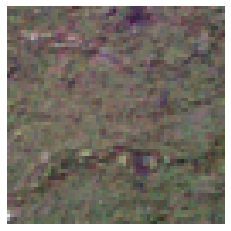

Predicted:   sea   GroundTruth:  land


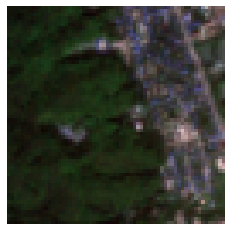

Predicted:   sea   GroundTruth:  land


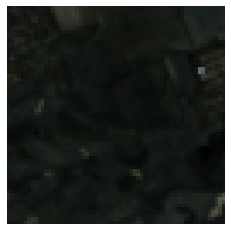

Predicted:   sea   GroundTruth:  land


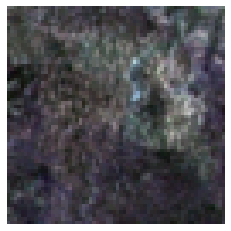

Predicted:   sea   GroundTruth:  land


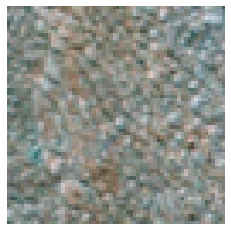

Predicted:   sea   GroundTruth:  land


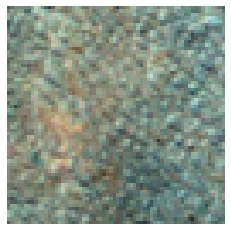

Predicted:   sea   GroundTruth:  land


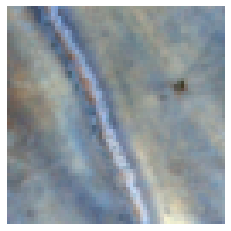

Predicted:   sea   GroundTruth:  land


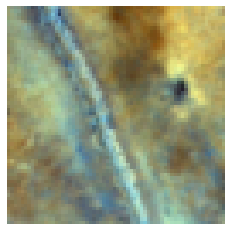

Predicted:   sea   GroundTruth:  land


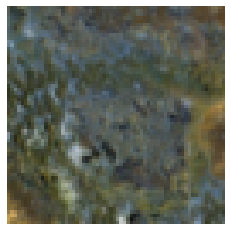

Predicted:   sea   GroundTruth:  land


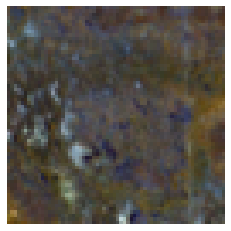

Predicted:   sea   GroundTruth:  land


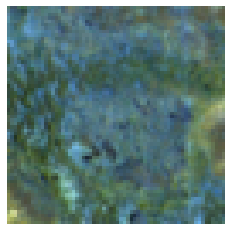

Predicted:   sea   GroundTruth:  land


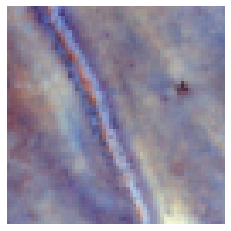

Predicted:   sea   GroundTruth:  land


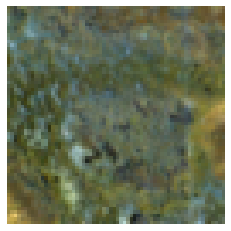

Predicted:   sea   GroundTruth:  land


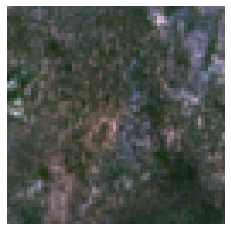

Predicted:   sea   GroundTruth:  land


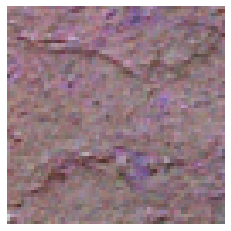

Predicted:   sea   GroundTruth:  land


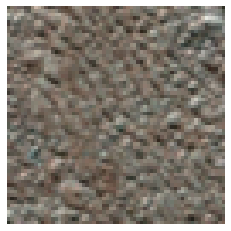

Predicted:   sea   GroundTruth:  land


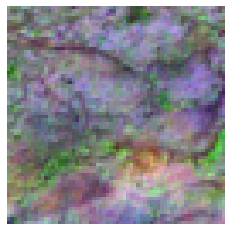

Predicted:   sea   GroundTruth:  land


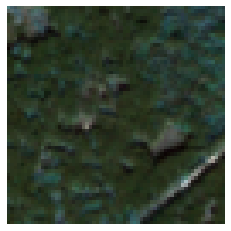

Predicted:   sea   GroundTruth:  land


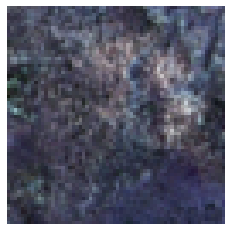

Predicted:   sea   GroundTruth:  land


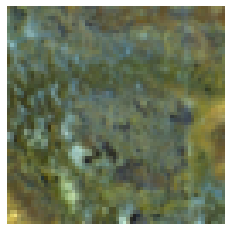

Predicted:   sea   GroundTruth:  land


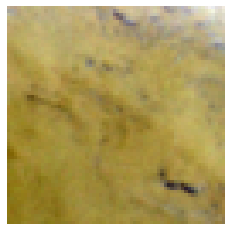

Predicted:   sea   GroundTruth:  land


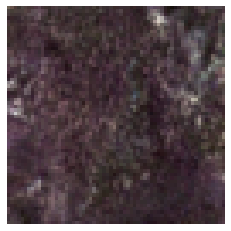

Predicted:   sea   GroundTruth:  land


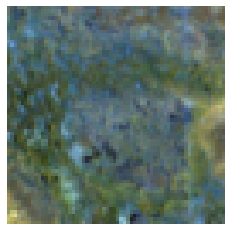

Predicted:   sea   GroundTruth:  land


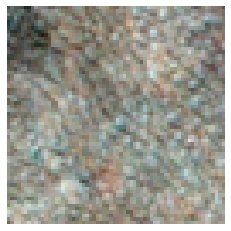

Predicted:   sea   GroundTruth:  land


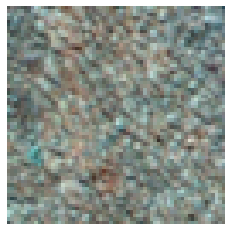

Predicted:   sea   GroundTruth:  land


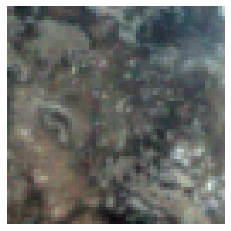

Predicted:   sea   GroundTruth:  land


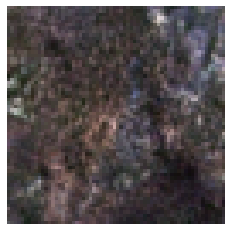

Predicted:   sea   GroundTruth:  land


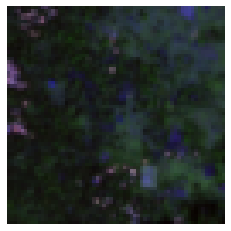

Predicted:   sea   GroundTruth:  land


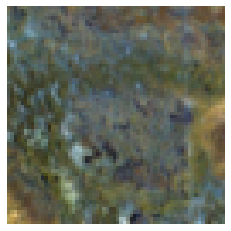

Predicted:   sea   GroundTruth:  land


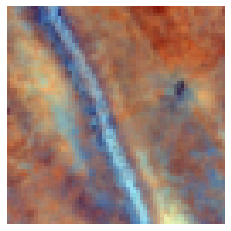

Predicted:   sea   GroundTruth:  land


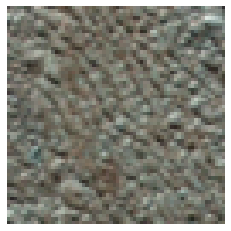

Predicted:   sea   GroundTruth:  land


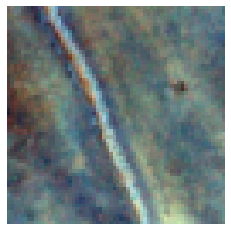

Predicted:   sea   GroundTruth:  land


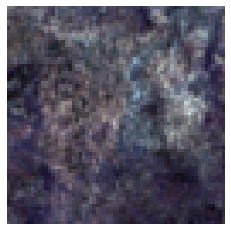

Predicted:   sea   GroundTruth:  land


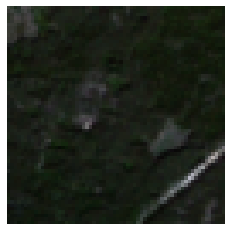

Predicted:   sea   GroundTruth:  land


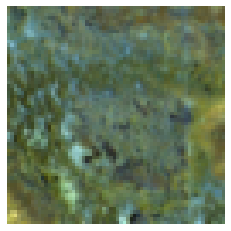

Predicted:   sea   GroundTruth:  land


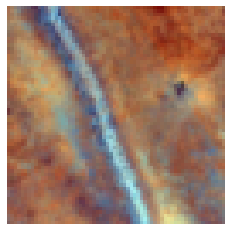

Predicted:   sea   GroundTruth:  land


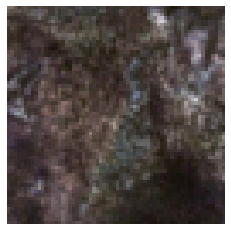

Predicted:   sea   GroundTruth:  land


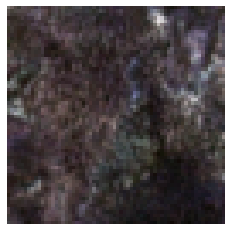

Predicted:   sea   GroundTruth:  land


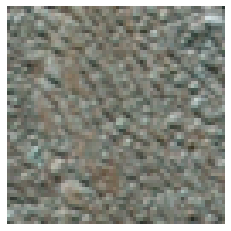

Predicted:   sea   GroundTruth:  land


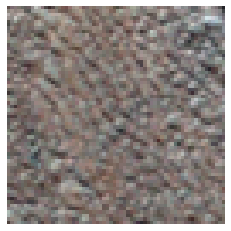

Predicted:   sea   GroundTruth:  land


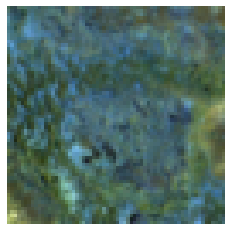

Predicted:   sea   GroundTruth:  land


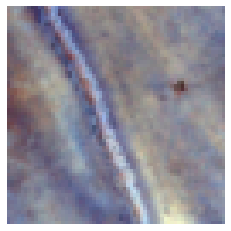

Predicted:   sea   GroundTruth:  land


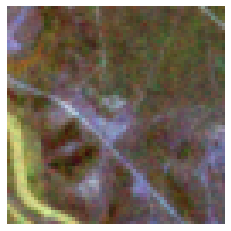

Predicted:   sea   GroundTruth:  land


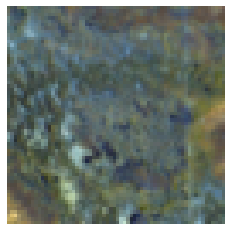

Predicted:   sea   GroundTruth:  land


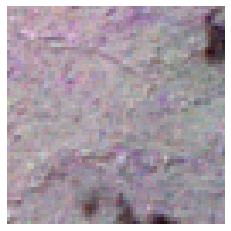

Predicted:   sea   GroundTruth:  land


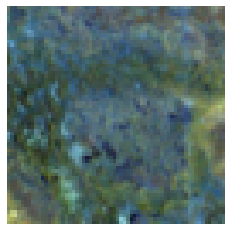

Predicted:   sea   GroundTruth:  land


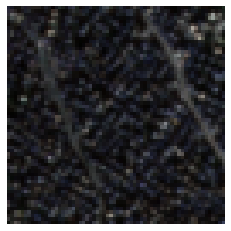

Predicted:   sea   GroundTruth:  land


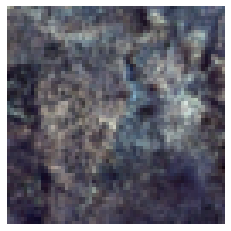

Predicted:   sea   GroundTruth:  land


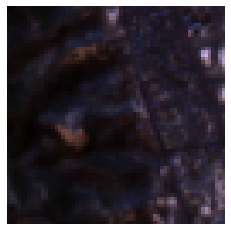

Predicted:   sea   GroundTruth:  land


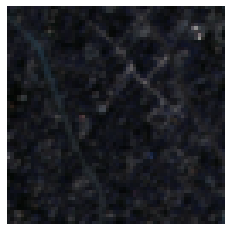

Predicted:   sea   GroundTruth:  land


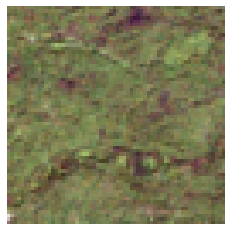

Predicted:   sea   GroundTruth:  land


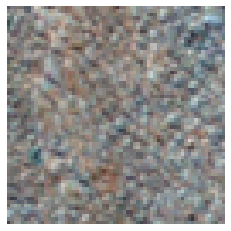

Predicted:   sea   GroundTruth:  land


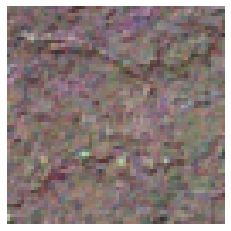

Predicted:   sea   GroundTruth:  land


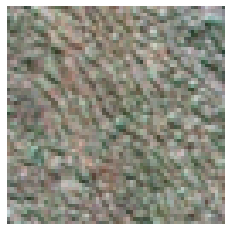

Predicted:   sea   GroundTruth:  land


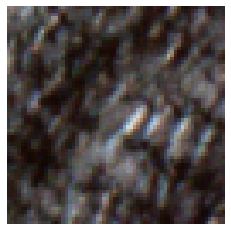

Predicted:  land   GroundTruth:   sea


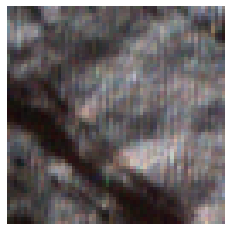

Predicted:  land   GroundTruth:   sea


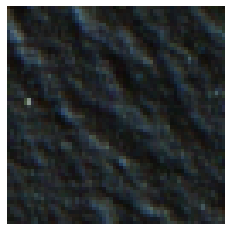

Predicted:  land   GroundTruth:   sea


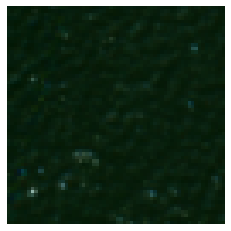

Predicted:  land   GroundTruth:   sea


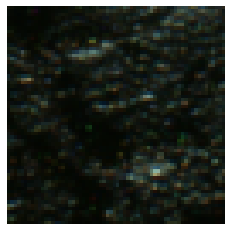

Predicted:  land   GroundTruth:   sea


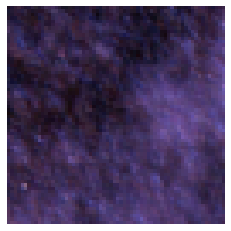

Predicted:  land   GroundTruth:   sea


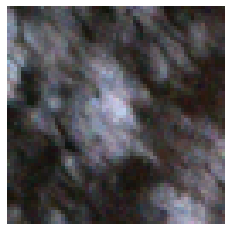

Predicted:  land   GroundTruth:   sea


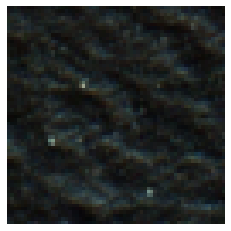

Predicted:  land   GroundTruth:   sea


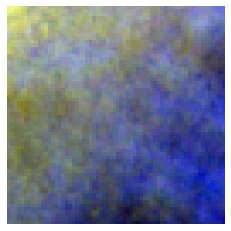

Predicted:  land   GroundTruth:   sea


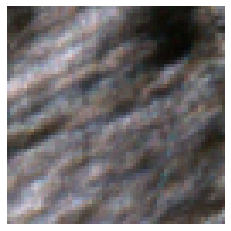

Predicted:  land   GroundTruth:   sea


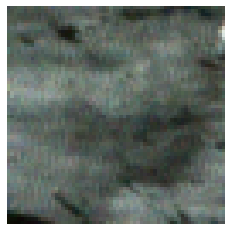

Predicted:  land   GroundTruth:   sea


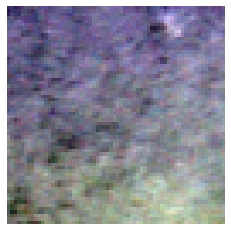

Predicted:  land   GroundTruth:   sea


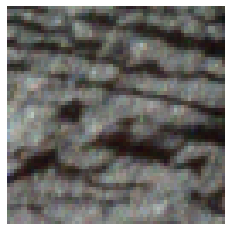

Predicted:  land   GroundTruth:   sea


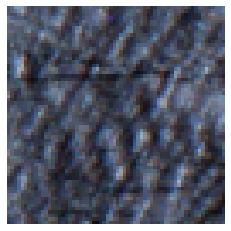

Predicted:  land   GroundTruth:   sea


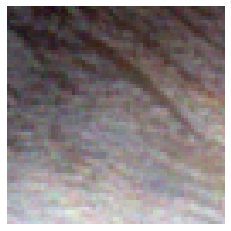

Predicted:  land   GroundTruth:   sea


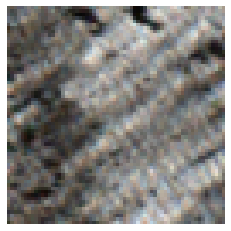

Predicted:  land   GroundTruth:   sea


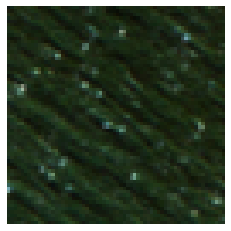

Predicted:  land   GroundTruth:   sea


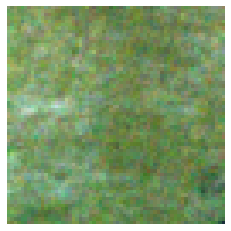

Predicted:  land   GroundTruth:   sea
Accuracy of the network on the 2000 test images: 94.850 %


In [ ]:
correct = 0
total = 0
classes = testset.classes
incorrect_index = []
net.load_state_dict(torch.load(PATH))
net.eval()
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        k = 1
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()      
        for i in range(len(images)):
          if classes[predicted[i]] != classes[labels[i]]:
            incorrect_index.append(i)
            w_images = images[i].cpu()
            imshow(w_images)
            print('Predicted:', ''.join('%5s' % classes[predicted[i]] ),'  GroundTruth:',''.join('%5s' % classes[labels[i]]))
print('Accuracy of the network on the 2000 test images: %.3f %%' % (
    100 * correct / total))